
# CODE TO CLASSIFY KYPHOSIS DISEASE USING DECISION TREES AND RANDOM FOREST CLASSIFIER
# Dr. Ryan @STEMplicity
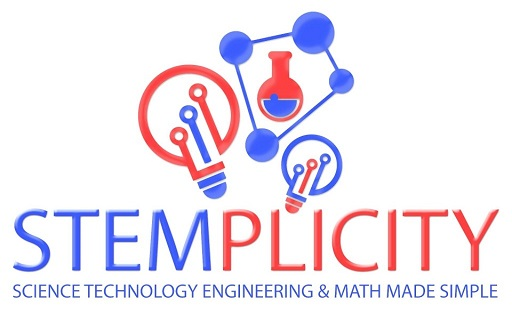



# PROBLEM STATEMENT

- Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output

INPUTS: 
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUTS:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.


- Link to the dataset: https://www.kaggle.com/abbasit/kyphosis-dataset

- Source: John M. Chambers and Trevor J. Hastie eds. (1992) Statistical Models in S, Wadsworth and Brooks/Cole, Pacific Grove, CA.

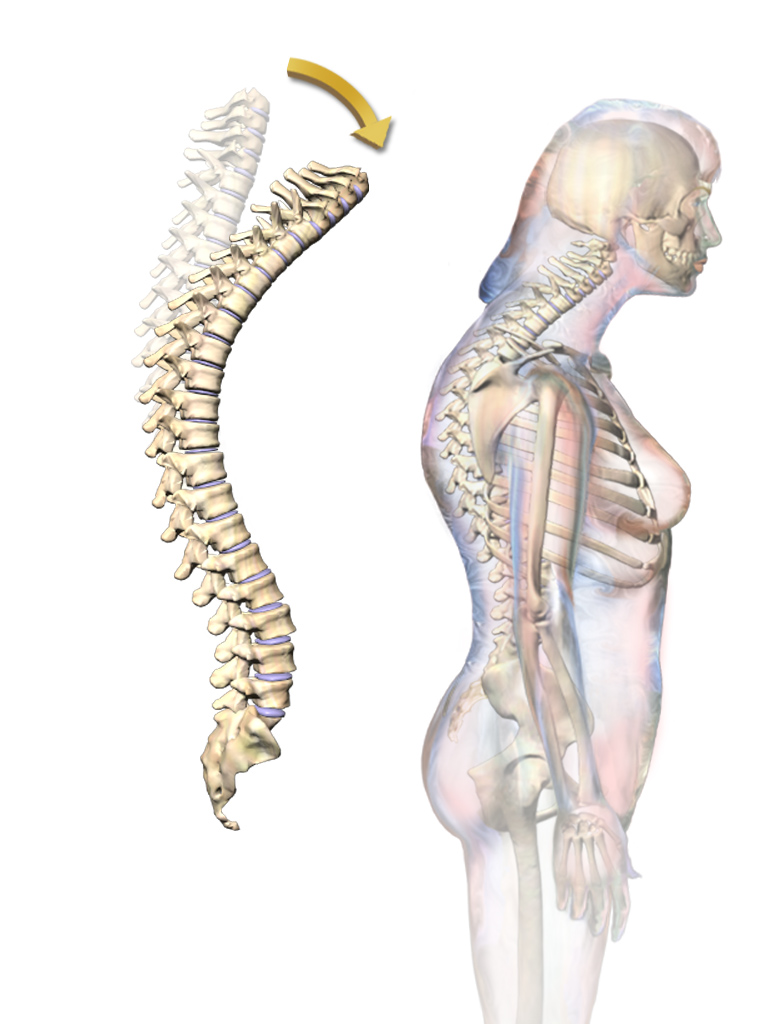

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #1: IMPORT DATASET

In [2]:
Kyphosis_df = pd.read_csv("kyphosis.csv")

In [3]:
Kyphosis_df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [4]:
Kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [5]:
Kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
Kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


# STEP #2: VISUALIZE DATASET

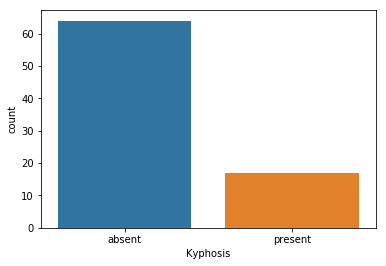

In [7]:
sns.countplot(Kyphosis_df['Kyphosis'], label = "Count") 

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
Kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(Kyphosis_df['Kyphosis'])

In [9]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16
6,0,61,2,17
7,0,37,3,16
8,0,113,2,16
9,1,59,6,12


In [10]:
Kyphosis_True = Kyphosis_df[Kyphosis_df['Kyphosis']==1]

In [11]:
Kyphosis_False = Kyphosis_df[Kyphosis_df['Kyphosis']==0]

In [12]:
print( 'Disease present after operation percentage =', (len(Kyphosis_True) / len(Kyphosis_df) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


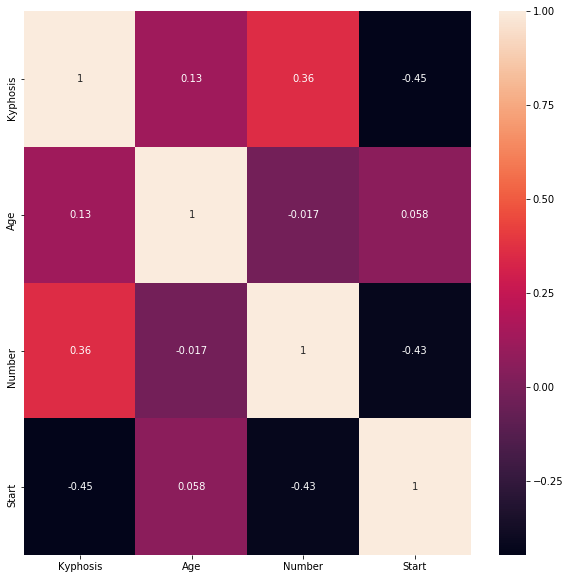

In [13]:
plt.figure(figsize=(10,10)) 
sns.heatmap(Kyphosis_df.corr(), annot=True) 

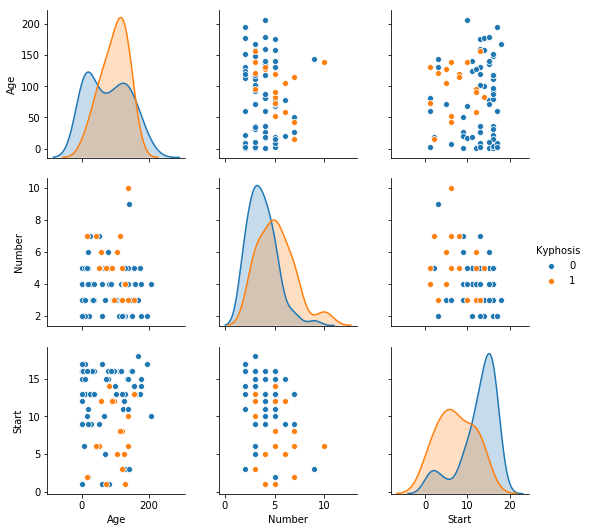

In [14]:
sns.pairplot(Kyphosis_df, hue='Kyphosis', vars = ['Age', 'Number', 'Start'])

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [15]:
# Let's drop the target label coloumns
X = Kyphosis_df.drop(['Kyphosis'],axis=1)
y = Kyphosis_df['Kyphosis']


In [16]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
5,1,2,16
6,61,2,17
7,37,3,16
8,113,2,16
9,59,6,12


In [17]:
y

0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    1
23    0
24    1
25    0
26    0
27    0
28    0
29    0
     ..
51    0
52    1
53    0
54    0
55    0
56    0
57    1
58    0
59    0
60    1
61    1
62    0
63    0
64    0
65    0
66    0
67    0
68    0
69    0
70    0
71    0
72    0
73    0
74    0
75    0
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


# STEP#4: TRAINING THE MODEL

In [21]:
X_train.shape

(56, 3)

In [22]:
y_train.shape

(56,)

In [23]:
X_test.shape

(25, 3)

In [24]:
y_test.shape

(25,)

In [25]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [27]:
feature_importances

,importance
Start,0.523935
Age,0.337200
Number,0.138866


# STEP#5: EVALUATING THE MODEL 

In [28]:
from sklearn.metrics import classification_report, confusion_matrix


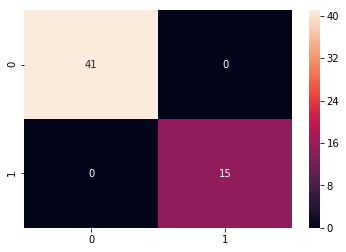

In [29]:
y_predict_train = decision_tree.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

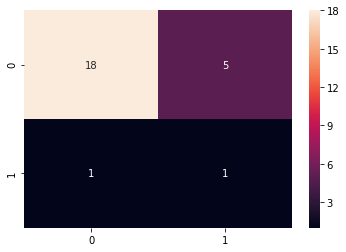

In [30]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [31]:
print(classification_report(y_test, y_predict_test))

             precision    recall  f1-score   support

          0       0.95      0.78      0.86        23
          1       0.17      0.50      0.25         2

avg / total       0.88      0.76      0.81        25



# STEP#6: IMPROVING THE MODEL 

In [32]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

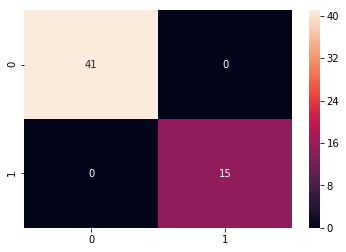

In [33]:
y_predict_train = RandomForest.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

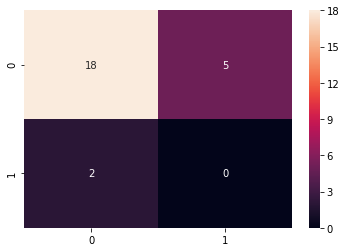

In [34]:
# Predicting the Test set results
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [35]:
print(classification_report(y_test, y_predict_test))

             precision    recall  f1-score   support

          0       0.90      0.78      0.84        23
          1       0.00      0.00      0.00         2

avg / total       0.83      0.72      0.77        25



# EXCELLENT JOB! 